In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [5]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [8]:
df = df.reindex(
    np.random.permutation(df.index))

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1279,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.9948,3.14,0.57,11.5,1
160,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.9959,3.20,0.56,9.6,0
505,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.9968,3.16,0.78,12.5,1
645,7.8,0.64,0.10,6.0,0.115,5.0,11.0,0.9984,3.37,0.69,10.1,1
156,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.9973,3.42,0.72,10.5,0


In [10]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1279 to 504
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int32
dtypes: float64(11), int32(1)
memory usage: 156.2 KB


In [11]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
dtype: int64

## Correlation between features 

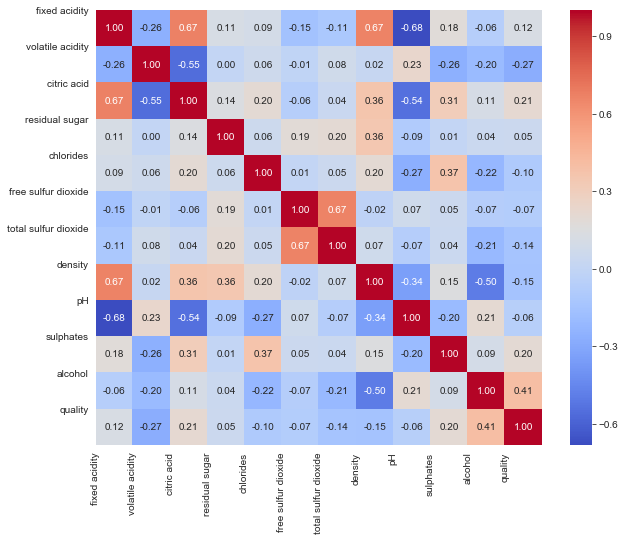

In [12]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [13]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [14]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1119, 11)
Shape of X_test:  (480, 11)
Shape of y_train:  (1119, 1)
Shape of y_test (480, 1)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Logistic Regression 

In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_lr_test = classifier_lr.predict(X_test_scaled)

In [20]:
print("Accuracy score: ", (accuracy_score(y_test, y_pred_lr_test)))
print("Precision score: ", (precision_score(y_test, y_pred_lr_test)))
print("Recall score: ", (recall_score(y_test, y_pred_lr_test)))

y_test_scores = classifier_lr.predict_proba(X_test_scaled)[:,1]

Accuracy score:  0.8958333333333334
Precision score:  0.6428571428571429
Recall score:  0.3103448275862069


In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr, tpr)


In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [23]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

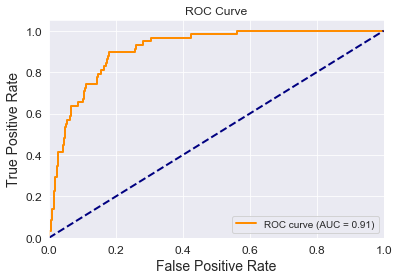

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy for Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Accuracy for Test set: ", accuracy_lr_test)

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
precision_lr_train = precision_score(y_train, y_pred_lr_train)
print("Precision Score for Training set: ", precision_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
precision_lr_test = precision_score(y_test, y_pred_lr_test)
print("Precision Score for Test set: ", precision_lr_test)

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
recall_lr_train = recall_score(y_train, y_pred_lr_train)
print("Recall Score for Train set: ", recall_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
recall_lr_test = recall_score(y_test, y_pred_lr_test)
print("Recall Score for Test set: ", recall_lr_test)


CV:  0.8704472329472329
Accuracy for Training set:  0.8757819481680071
Accuracy for Test set:  0.8958333333333334
Precision Score for Training set:  0.6219512195121951
Precision Score for Test set:  0.6428571428571429
Recall Score for Train set:  0.32075471698113206
Recall Score for Test set:  0.3103448275862069


In [26]:
confusion_matrix(y_test, y_pred_lr_test)

array([[412,  10],
       [ 40,  18]], dtype=int64)

In [27]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

## Support Vector Machine 

In [28]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', probability=True)
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_lr_test = classifier_svm_linear.predict(X_test_scaled)

In [30]:
print("Accuracy score: ", (accuracy_score(y_test, y_pred_lr_test)))
print("Precision score: ", (precision_score(y_test, y_pred_lr_test)))
print("Recall score: ", (recall_score(y_test, y_pred_lr_test)))

y_test_scores = classifier_svm_linear.predict_proba(X_test_scaled)[:,1]

Accuracy score:  0.8791666666666667
Precision score:  0.0
Recall score:  0.0


C:\Users\usha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr, tpr)

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [33]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

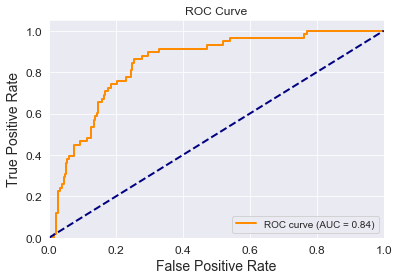

In [34]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)



CV:  0.8579150579150578
Training set:  0.8579088471849866
Test set:  0.8791666666666667


In [36]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[422,   0],
       [ 58,   0]], dtype=int64)

In [37]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

## Comparing the models 

In [38]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean())
         ]

In [40]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,412,10,18,40,0.875782,0.895833,0.870447
1,SVM (Linear),422,0,0,58,0.857909,0.879167,0.857915


# Conclusion:


Logistic Regression gives better result than SVM classifier